<a href="https://colab.research.google.com/github/ASTRONOE/Common_Data_Analysis/blob/KreativStorm/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analysis Hands-On Program - KreativStorm**
##WEEK 2 ASSIGNMENT

In [ ]:
#ensure pyreadstat for spss is installed!!
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
#load libraries
import numpy as np
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from scipy.stats import shapiro, boxcox, pointbiserialr
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from google.colab import files

In [ ]:
sav_file = files.upload() #upload file from explorer

Saving Birthweight_reduced_kg_SPSS.sav to Birthweight_reduced_kg_SPSS.sav


In [ ]:
Df, meta = prs.read_sav("Birthweight_reduced_kg_SPSS.sav") #load file

In [ ]:
#print dataframe summary
print(Df.shape)
print(Df.info())

(42, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     float64
 1   Headcirc     42 non-null     float64
 2   Length       42 non-null     float64
 3   Birthweight  42 non-null     float64
 4   Gestation    42 non-null     float64
 5   mage         42 non-null     float64
 6   smoker       42 non-null     float64
 7   mheight      42 non-null     float64
 8   mppwt        42 non-null     float64
 9   fage         42 non-null     float64
 10  fedyrs       42 non-null     float64
 11  fnocig       42 non-null     float64
 12  fheight      42 non-null     float64
 13  lowbwt       42 non-null     float64
 14  mage35       42 non-null     float64
 15  mnocig       42 non-null     float64
dtypes: float64(16)
memory usage: 5.4 KB
None


In [ ]:
# Accessing the variable names
print("Variable names:\n", meta.column_names)

# Accessing the variable labels
print("Variable labels:\n", meta.variable_value_labels)

# Accessing the detailed information about each variable
print("Variable information:")
print(meta.column_names_to_labels)

Variable names:
 ['ID', 'Headcirc', 'Length', 'Birthweight', 'Gestation', 'mage', 'smoker', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight', 'lowbwt', 'mage35', 'mnocig']
Variable labels:
 {'smoker': {0.0: 'Non-smoker', 1.0: 'Smoker'}, 'lowbwt': {0.0: 'Not low birthweight', 1.0: 'Low birthweight'}, 'mage35': {0.0: 'Aged < 35', 1.0: 'Aged 35+'}}
Variable information:
{'ID': 'Baby ID', 'Headcirc': 'Head circumference (cm)', 'Length': 'Length of baby (cm)', 'Birthweight': 'Birthweight (kg)', 'Gestation': 'Gestational age at birth (weeks)', 'mage': 'Maternal age', 'smoker': None, 'mheight': 'Maternal height (cm)', 'mppwt': "Mother's pre-pregnancy weight (kg)", 'fage': "Father's age", 'fedyrs': 'Years father was in education', 'fnocig': 'Number of cigarettes smoked per day by father', 'fheight': "Father's height (cm)", 'lowbwt': 'Low birthweight baby', 'mage35': 'Mother aged over 35', 'mnocig': 'Number of cigarettes smoked per day by mother'}


In [ ]:
Df.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,0.0,162.0,57.0,23.0,10.0,35.0,179.0,0.0,0.0,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,0.0,171.0,62.0,19.0,12.0,0.0,183.0,0.0,0.0,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,0.0,172.0,58.0,31.0,16.0,25.0,185.0,0.0,1.0,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,0.0,174.0,68.0,26.0,14.0,25.0,189.0,0.0,0.0,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,0.0,175.0,66.0,30.0,12.0,0.0,184.0,0.0,0.0,0.0


In [ ]:
Df.describe()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,34.595238,51.333333,3.312857,39.190476,25.547619,0.523810,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238,9.428571
std,467.616186,2.399792,2.935624,0.603895,2.643336,5.666342,0.505487,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102,12.511737
min,27.000000,30.000000,43.000000,1.920000,33.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000,0.000000
25%,537.250000,33.000000,50.000000,2.940000,38.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000,0.000000
50%,821.000000,34.000000,52.000000,3.295000,39.500000,24.000000,1.000000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000,4.500000
75%,1269.500000,36.000000,53.000000,3.647500,41.000000,29.000000,1.000000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000,15.750000
max,1764.000000,39.000000,58.000000,4.570000,45.000000,41.000000,1.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000,50.000000


`Q1. What is the mean father’s age?`

In [ ]:
Df.fage.mean()

28.904761904761905

`Q2. What is the mean father’s age for low birthweight babies?`

In [ ]:
Df[Df['lowbwt'] == 1.0]['fage'].mean()

24.833333333333332

`Q3. Is the father's age normally distributed? Justify your answer.`

<Axes: title={'center': "Distribution of father's age"}, ylabel='Frequency'>

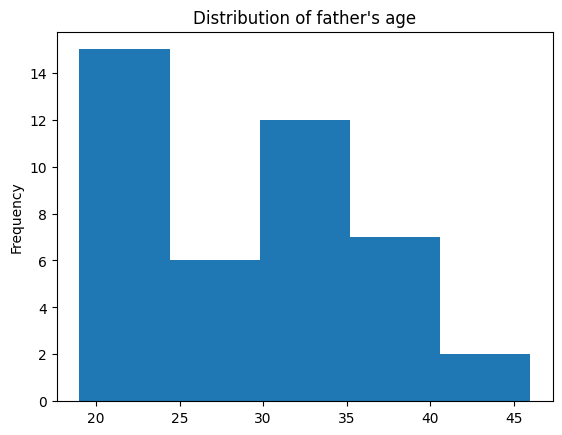

In [ ]:
fage = Df.fage
fage.plot.hist(bins=5, title="Distribution of father's age")

Text(0.5, 1.0, 'QQ plot to test for normality')

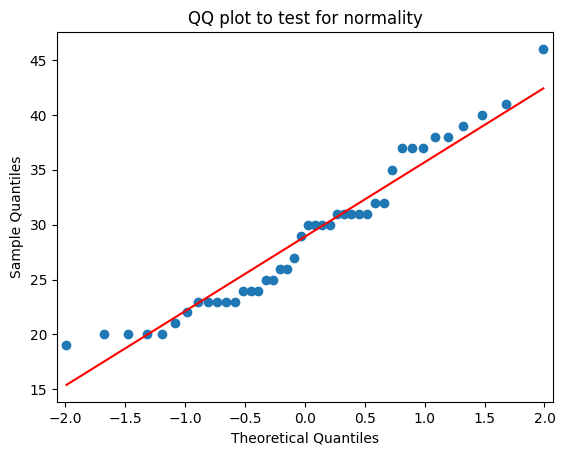

In [ ]:
#Using QQ-plot
sm.qqplot(fage, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(fage)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed")

The shapiro p-value, 0.038500070571899414 is less than the alpha, 0.05
This implies that the data is not normally distributed


`Answer:` All results from the histogram, the QQ-plot and Shapiro-Wilk test imply that the father's age is not normally distributed

`Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?`

In [ ]:
Df['fage_log'] = np.log(fage)
Df['fage_log'].mean()

3.3370421189026085

`Q5. Is the above mean score a good representation of the real value? Justify your answer.`

<Axes: ylabel='Frequency'>

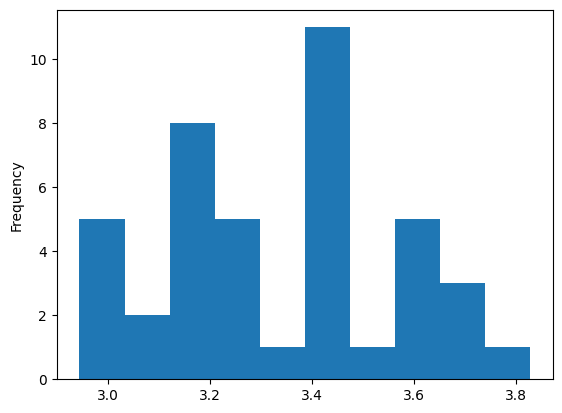

In [ ]:
Df['fage_log'].plot.hist()

In [ ]:
np.exp(Df['fage_log'].mean())

28.13578120774406

`Answer:` Yes approximately, it is a good representation of the mean score.

`Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.`

<Axes: title={'center': "Distribution of father's age"}, ylabel='Frequency'>

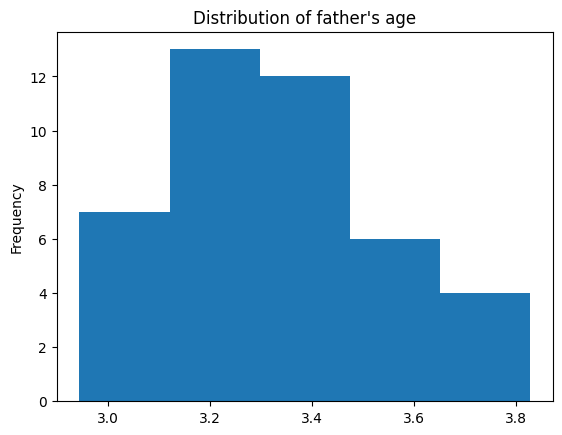

In [ ]:
fage_log = Df['fage_log']
fage_log.plot.hist(bins=5, title="Distribution of father's age")

Text(0.5, 1.0, 'QQ plot to test for normality')

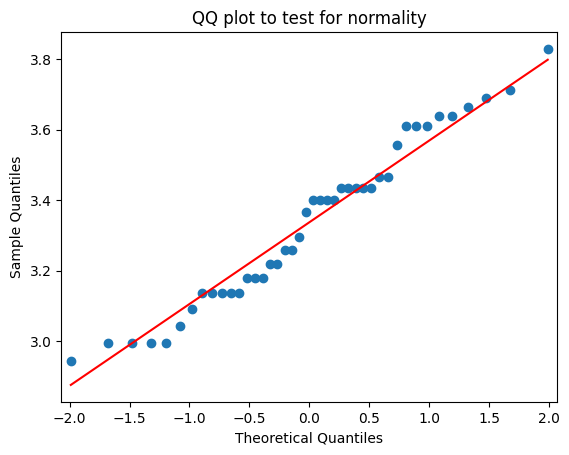

In [ ]:
#Using QQ-plot
sm.qqplot(fage_log, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(fage_log)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed")

The shapiro p-value, 0.12867869436740875 is greater than the alpha, 0.05
This implies that the data is normally distributed


`Answer` The data is normally distributed according the different tests used, although the diagram is a bit asymmetric

`Q7. Is the variable “years father was in education” normally distributed? `

<Axes: title={'center': "Years of fathers' education"}, ylabel='Frequency'>

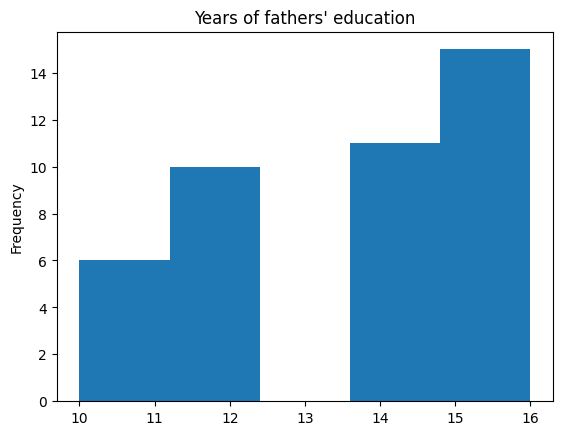

In [ ]:
fed = Df.fedyrs
fed.plot.hist(bins=5, title="Years of fathers' education")

Text(0.5, 1.0, 'QQ plot to test for normality')

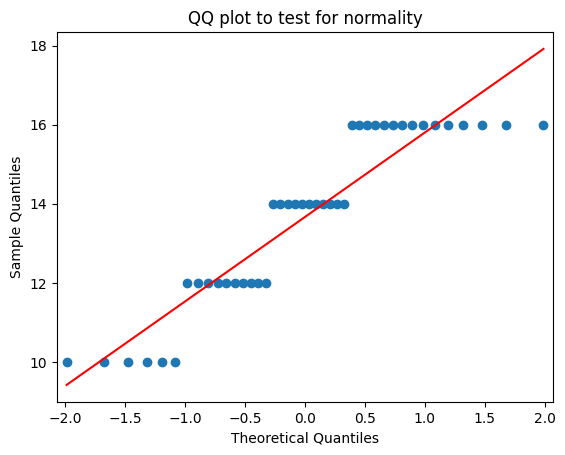

In [ ]:
#Using QQ-plot
sm.qqplot(fed, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(fed)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed")

The shapiro p-value, 4.4836884626420215e-05 is less than the alpha, 0.05
This implies that the data is not normally distributed


`Answer` All three tests show that the data is not normally distributed. The shapiro value is 4.5 and there are gaps in the QQ-plot and histogram.

`Q8. Mentioning the null and alternative hypotheses, explain the above answer. `

All three tests show that the data is not normally distributed. The shapiro value is 4.5 and there are gaps in the QQ-plot and histogram, which is far above the usual 0.05 value for vindicating the null hyother. And so we reject the null hypothesis, H0 which assumes that the data is a normal distribution, and we accept the alternative hypothesis, H1.

`Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?`

In [ ]:
transformed_education, lambda_value = boxcox(fed)
Df['bctrans'] = transformed_education
Df['bctrans'].mean()

157.96716280846272

`Q10. Is this new variable normally distributed? Explain.`

<Axes: title={'center': "Years of fathers' education transformed by boxcox"}, ylabel='Frequency'>

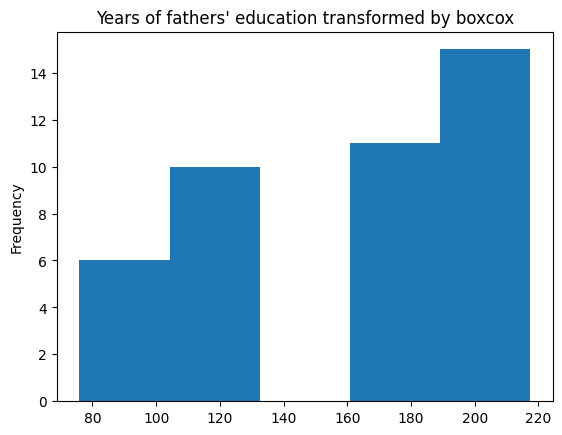

In [ ]:
bctrans = Df['bctrans']
bctrans.plot.hist(bins=5, title="Years of fathers' education transformed by boxcox")

Text(0.5, 1.0, 'QQ plot to test for normality')

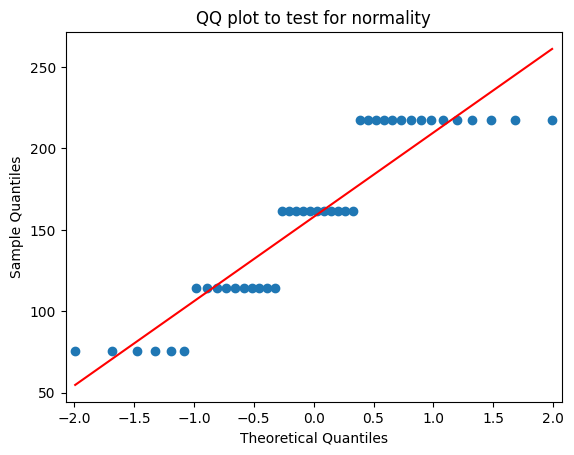

In [ ]:
#Using QQ-plot
sm.qqplot(bctrans, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(bctrans)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed")

The shapiro p-value, 4.1828556277323514e-05 is less than the alpha, 0.05
This implies that the data is not normally distributed


`Answer` All three tests show that the data is not normally distributed. The shapiro value is 4.5 and there are gaps in the QQ-plot and histogram. In fact it bears a lot of similarity with the original distribution.

`Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?`

In [ ]:
Df[Df['mage'] < 35]['bctrans'].mean()

153.1804464073593

`Q12. Which test would you use to investigate the relationship between birth weight and father's age?`
* Pearson product-moment correlation
* Spearman’s Rank order correlation
* Point-Biserial correlation
* Phi-Coefficient

In [ ]:
Df[['Birthweight', 'fage']]

,Birthweight,fage
0,4.55,23.0
1,4.32,19.0
2,4.10,31.0
3,4.07,26.0
4,3.94,30.0
5,3.93,31.0
6,3.77,31.0
7,3.65,21.0
8,3.63,20.0
9,3.42,22.0


<Axes: xlabel='Birthweight', ylabel='fage'>

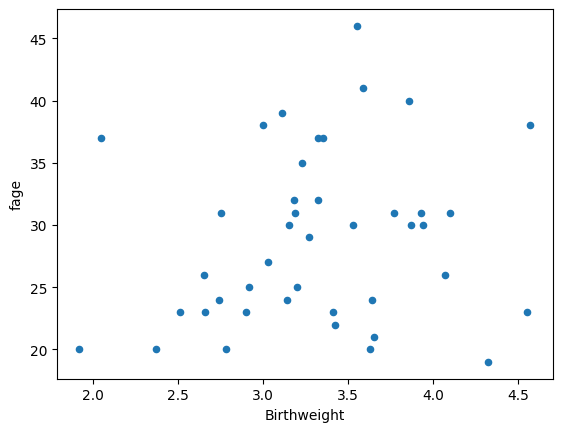

In [ ]:
Df.plot.scatter(x='Birthweight', y='fage')

In [ ]:
print(Df['Birthweight'].corr(Df['fage'], method='spearman'))
print(Df['fage'].corr(Df['Birthweight'], method='pearson'))

0.17810631240688332
0.17570999332980183


`Answer` I will use Pearson correlation coefficient

`Q13. Justify the above choice in terms of the distribution of data and the nature of the test.`

`Answer` I will use Pearson correlation coefficient because the data assumes a normal distribution, and both variables have a continuous range.

`Q14. What is the direction of that relationship?`

`Answer` positive correlation.

`Q15. What is the form of that relationship?`

`Answer` Non-linear relationship.

`Q16. What is the degree of that relationship?`

`Answer` 0.178 implies weak correlation.

`Q17. What test would you use to investigate the relationship between smoking and birth weight?`

`Answer` Point-Biseral correlation

`Q18. Report on the above results including information about direction/form/degree of the relationship.`

In [ ]:
pointbiserialr(Df['smoker'], Df['Birthweight'])

SignificanceResult(statistic=-0.31423394642987135, pvalue=0.04269624654559381)

<Axes: xlabel='smoker', ylabel='Birthweight'>

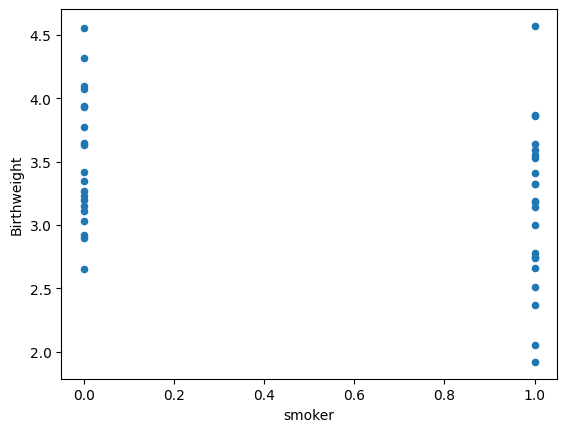

In [ ]:
Df.plot.scatter(x='smoker', y='Birthweight')

`Answer` Using point-biseral correlation, we find out that the correlation coefficient is -0.314 which implies a negative correlation. Because it is a binary data, the form is sigmoid, and is of a strong degree since non-smokers don't have babies weighing below 2.6kg unlike the smokers. The smokers have few babies weighing above 3.6kg.

`Q19. If you wanted to see the effect of the length of a baby on birthweight, what would your independent variable be?`
* Length of baby
* Birthweight

`Answer` Length of a baby

`Q20. In statistics, when creating a scatterplot, it is a common practice to put the independent variable on the x-axis and the dependent variable on the y-axis. With this in mind, create a scatterplot for the above case and provide the regression line. For homework submitted using MS Word, insert a picture of the scatterplot.`

Text(0.5, 1.0, 'Correlation between baby length and weight')

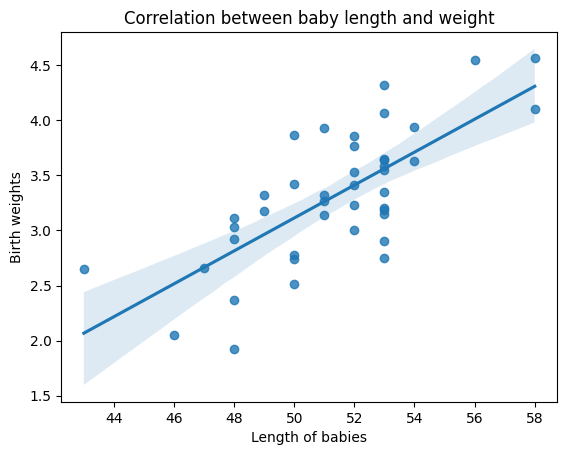

In [ ]:
sb.regplot(data=Df, x='Length', y='Birthweight')
plt.xlabel('Length of babies')
plt.ylabel('Birth weights')
plt.title('Correlation between baby length and weight')

`Q21. Is the relationship between the length of baby and birthweight linear?`
* Yes
* No

Yes

`Q22. Justify the above choice.`

In [ ]:
Df['Length'].corr(Df['Birthweight'], method='pearson')

0.7268334847885263

The visual order of the points on the scatter plot, the slope of the regression line, and the correlation coefficint of 0.72 indicate that this is a strong positive correlation between the two variables.

`Q23. Is there any evidence to suggest that the birth weight, length of baby, and head circumference are related?`

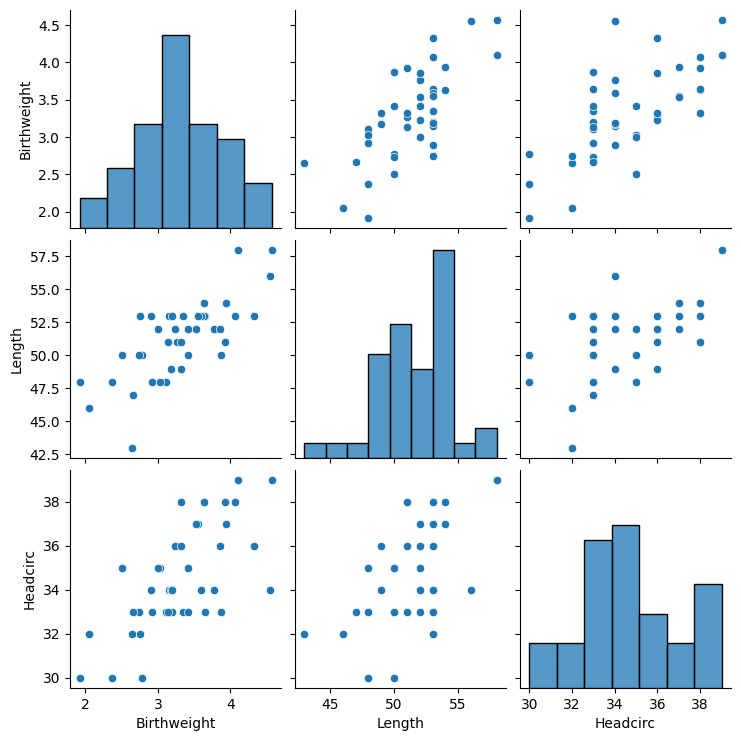

In [ ]:
sb.pairplot(Df[['Birthweight', 'Length', 'Headcirc']])

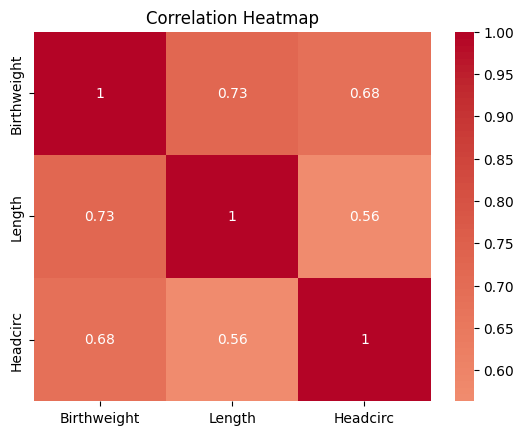

In [ ]:
correlation_matrix = Df[['Birthweight', 'Length', 'Headcirc']].corr()

# Create the correlation heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


Yes

`Q24. Justify the above choice.`

In nature length or size of objects of the same density share proportion with mass or weight. In this case, an increase in head circumference or length should concur with an increase in weight.

`Q25. Describe the above relationship in your own words and provide evidence for your claims.`

I used a correlation heatmap and a pairplot to assess the three variables. It showed a strong positive correlated values: 0.56, 0.68 and 0.73 among the three.